In [681]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df=pd.read_excel('../Resource/ExperimentDataBase/CV_Data_5_Cor.xlsx')
#df = pd.read_excel('WT_HXX.xlsx')

In [682]:
df.head()

,TCART,CIrededge２,DVI,OSAVI,MTVI,CV
0,0.209295,0.302903,0.200040,0.475878,0.074236,0.5827
1,0.084067,0.104513,0.080682,0.304724,0.032676,0.3358
2,0.153540,0.212718,0.146928,0.418618,0.056766,0.6749
3,0.249560,0.410743,0.237352,0.504890,0.085574,0.6258
4,0.251764,0.415978,0.239668,0.507217,0.086328,0.7649


In [683]:
df.columns

Index(['TCART', 'CIrededge２', 'DVI', 'OSAVI', 'MTVI', 'CV'], dtype='object')

In [684]:

x_colums=['NDVI', 'GNDVI', 'EVI', 'MSR', 'TCART', 'CIrededge１', 'CIgreen', 'RDVI',
       'RVI', 'TVI', 'LCI1', 'LCI2', 'MTVI']
y_colums=['SPAD']
all_colums=['NDVI', 'GNDVI', 'EVI', 'MSR', 'TCART', 'CIrededge１', 'CIgreen', 'RDVI',
       'RVI', 'TVI', 'LCI1', 'LCI2', 'MTVI', 'SPAD']


In [685]:
# print(df[all_colums].nunique())

In [686]:
print(df[df.duplicated()])#无重复值

Empty DataFrame
Columns: [TCART, CIrededge２, DVI, OSAVI, MTVI, CV]
Index: []


In [687]:
# #数据初步可视化
# #绘制直方图
# def hist(df):
#     df.hist(figsize=(30,20))
#     plt.show()
#     plt.savefig('a.png')
# hist(df[all_colums])

In [688]:

# #绘制散点图
# def scatter(df):
#     for i in all_colums[:6]:
#          plt.scatter(df[i],df['SPAD'])
#          plt.xlabel(i)
#          plt.ylabel('SPAD')
#          plt.show()
# scatter(df)

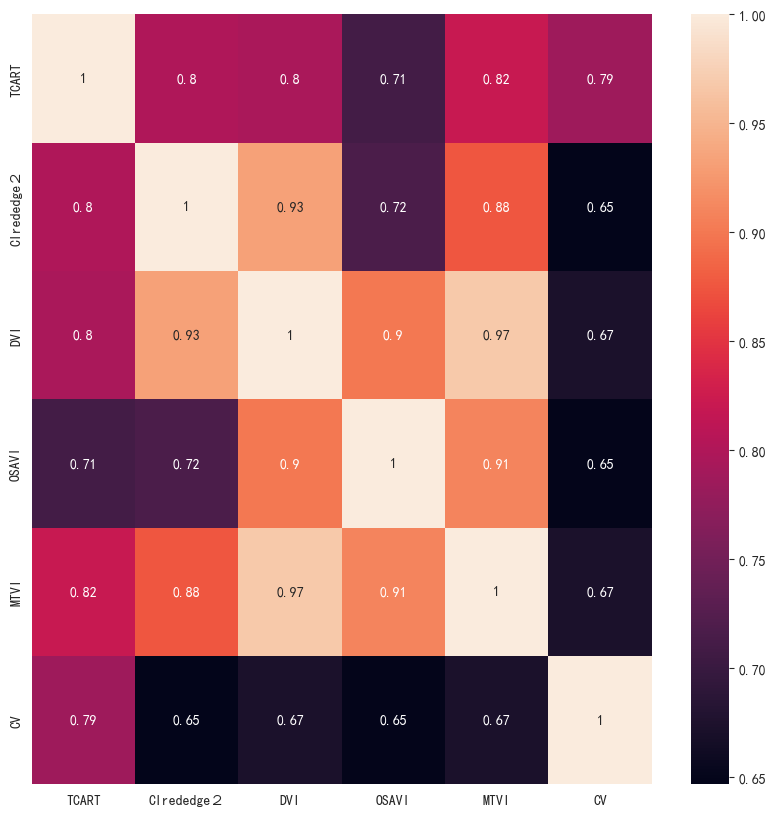

In [689]:
#相关系数查看特征与特征，特征与响应的线性关系
def corr_view():
    data_corr=df.corr()
    data_corr=data_corr.abs()
    sns.heatmap(data_corr,annot=True)
    sns.set_context({"figure.figsize":(10,10)})
    plt.savefig('b.png')
corr_view()

In [690]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [691]:
# for i in all_colums:
#     f,ax=plt.subplots(figsize=(10,8))
#     sns.boxplot(y=i,data=df,ax=ax)
#     plt.show()
#     plt.savefig('c.png', dpi=500)

In [692]:

# #这里选择基于Filter(过滤法)中的卡方检验
# from sklearn.feature_selection import chi2, SelectKBest
# feutures=['NDVI', 'GNDVI', 'EVI', 'MSR', 'TCART', 'CIrededge１', 'CIgreen', 'RDVI',
#        'RVI', 'TVI', 'LCI1', 'LCI2', 'MTVI']
# X, y = df[feutures],df['SPAD']
# chi2_model = SelectKBest(chi2, k=3)
# # 以下方法返回选择后的特征矩阵
# chi2_model.fit_transform(X, y)
# for i in range(X.shape[1]):
#     print((chi2_model.scores_[i], chi2_model.pvalues_[i]))

In [693]:
#归一化;归一化通常有两种：最值归一化和均值方差归一化，这里采用均值方差归一化
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=MinMaxScaler(feature_range=(0,1))
final_df_scaler=scaler.fit_transform(df)



In [694]:
len(df.columns)

6

In [707]:
#对新文件训练集与测试集划分
from sklearn.model_selection import train_test_split
#random_state:设置随机种子，保证每次运行生成相同的随机数
train_set,test_set = train_test_split(final_df_scaler, test_size=0.1,random_state=46)

x_train=train_set[:,0:len(df.columns)-1]
y_train=train_set[:,len(df.columns)-1]
x_test=test_set[:,0:len(df.columns)-1]
y_test=test_set[:,len(df.columns)-1]
print(x_train.shape)
print(y_test.shape)
print(y_train.dtype)


#2.使用非线性支持向量机（SVM）进行回归预测
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
model =svr.fit(x_train,y_train)
prediction=model.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,prediction))
#准确率为： 0.9191176470588235

(59, 5)
(7,)
float64
0.5315393203666605


In [648]:
# #进行模型训练
# #1.线性回归
# from sklearn import linear_model
# #from sklearn import model_selection
# from sklearn.linear_model import LinearRegression
# def test_LinearRegression():
#     linearRegression = linear_model.LinearRegression()
#     #进行训练
#     linearRegression.fit(x_train, y_train)
#     #通过LinearRegression的coef_属性获得权重向量,intercept_获得b的值
#     print("权重向量:%s, b的值为:%.2f" % (linearRegression.coef_, linearRegression.intercept_))
#     #计算出损失函数的值
#     print("损失函数的值: %.2f" % np.mean((linearRegression.predict(x_test) - y_test) ** 2))
#     #计算预测性能得分
#     print("预测性能得分: %.2f" % linearRegression.score(x_test, y_test))

In [649]:
# test_LinearRegression()

In [650]:
#2.使用非线性支持向量机（SVM）进行回归预测
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
model =svr.fit(x_train,y_train)
prediction=model.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,prediction))
#准确率为： 0.9191176470588235

-1.6400375998530499


In [720]:
# Fit regression model
from sklearn.svm import SVR
from sklearn.metrics import r2_score
# svr = SVR(kernel='rbf',C=10)
# model = svr.fit(X_train, y_train)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
# Grid search for best hyperparameters
#这里使用网格搜索方法，对正则化参数C和核函数的参数gamma进行了调整，并使用交叉验证来选择最佳的超参数。在训练集和测试集上分别计算了均方误差（MSE）。
param_grid = {
    'C': [0.01,0.1, 1, 10, 100,1000],
    'gamma': [0.001,0.005, 0.01,0.05, 0.1,0.5, 1, 'scale', 'auto']
}

grid_search = GridSearchCV(SVR(kernel='sigmoid'), param_grid, cv=5, scoring='neg_mean_squared_error')

# 初始化三个不同的回归模型
# lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=200)


# 构建模型集成器
model = VotingRegressor(estimators=[ ('rf', rf), ('svr', grid_search)])

# 拟合模型并进行预测
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)#训练集上的预测结果
y_pred_test = model.predict(x_test)#测试集预测结果

#grid_search.fit(X_train, y_train)

# Train and evaluate model
#model = grid_search.best_estimator_
#y_pred_train = model.predict(X_train)
#y_pred_test = model.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("R2:", r2_score(y_test, y_pred_test))

Train MSE: 0.011754674679556971
Test MSE: 0.01226794732304821
R2: 0.6158936697966502
